<a href="https://colab.research.google.com/github/zulianwahid/UTSMachineLearning/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

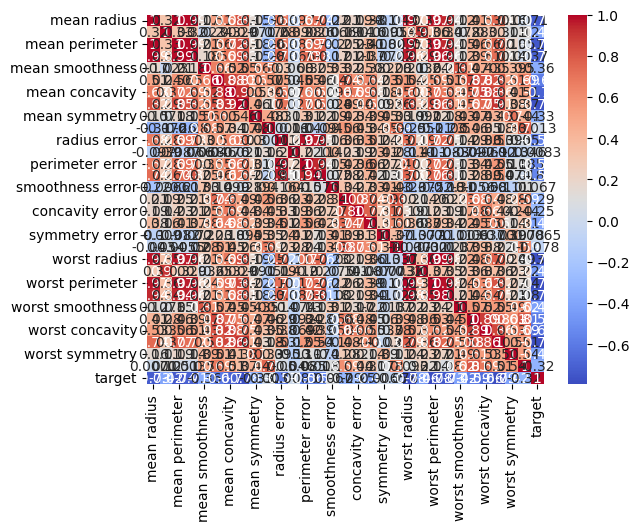

Error in callback <function flush_figures at 0x7f4a1c21a940> (for post_execute):


KeyboardInterrupt: ignored

In [3]:
!pip install seaborn
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
sns.pairplot(df, hue='target')
sns.countplot(data=df, x='target')

<ipython-input-4-832f1c0f0d53>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


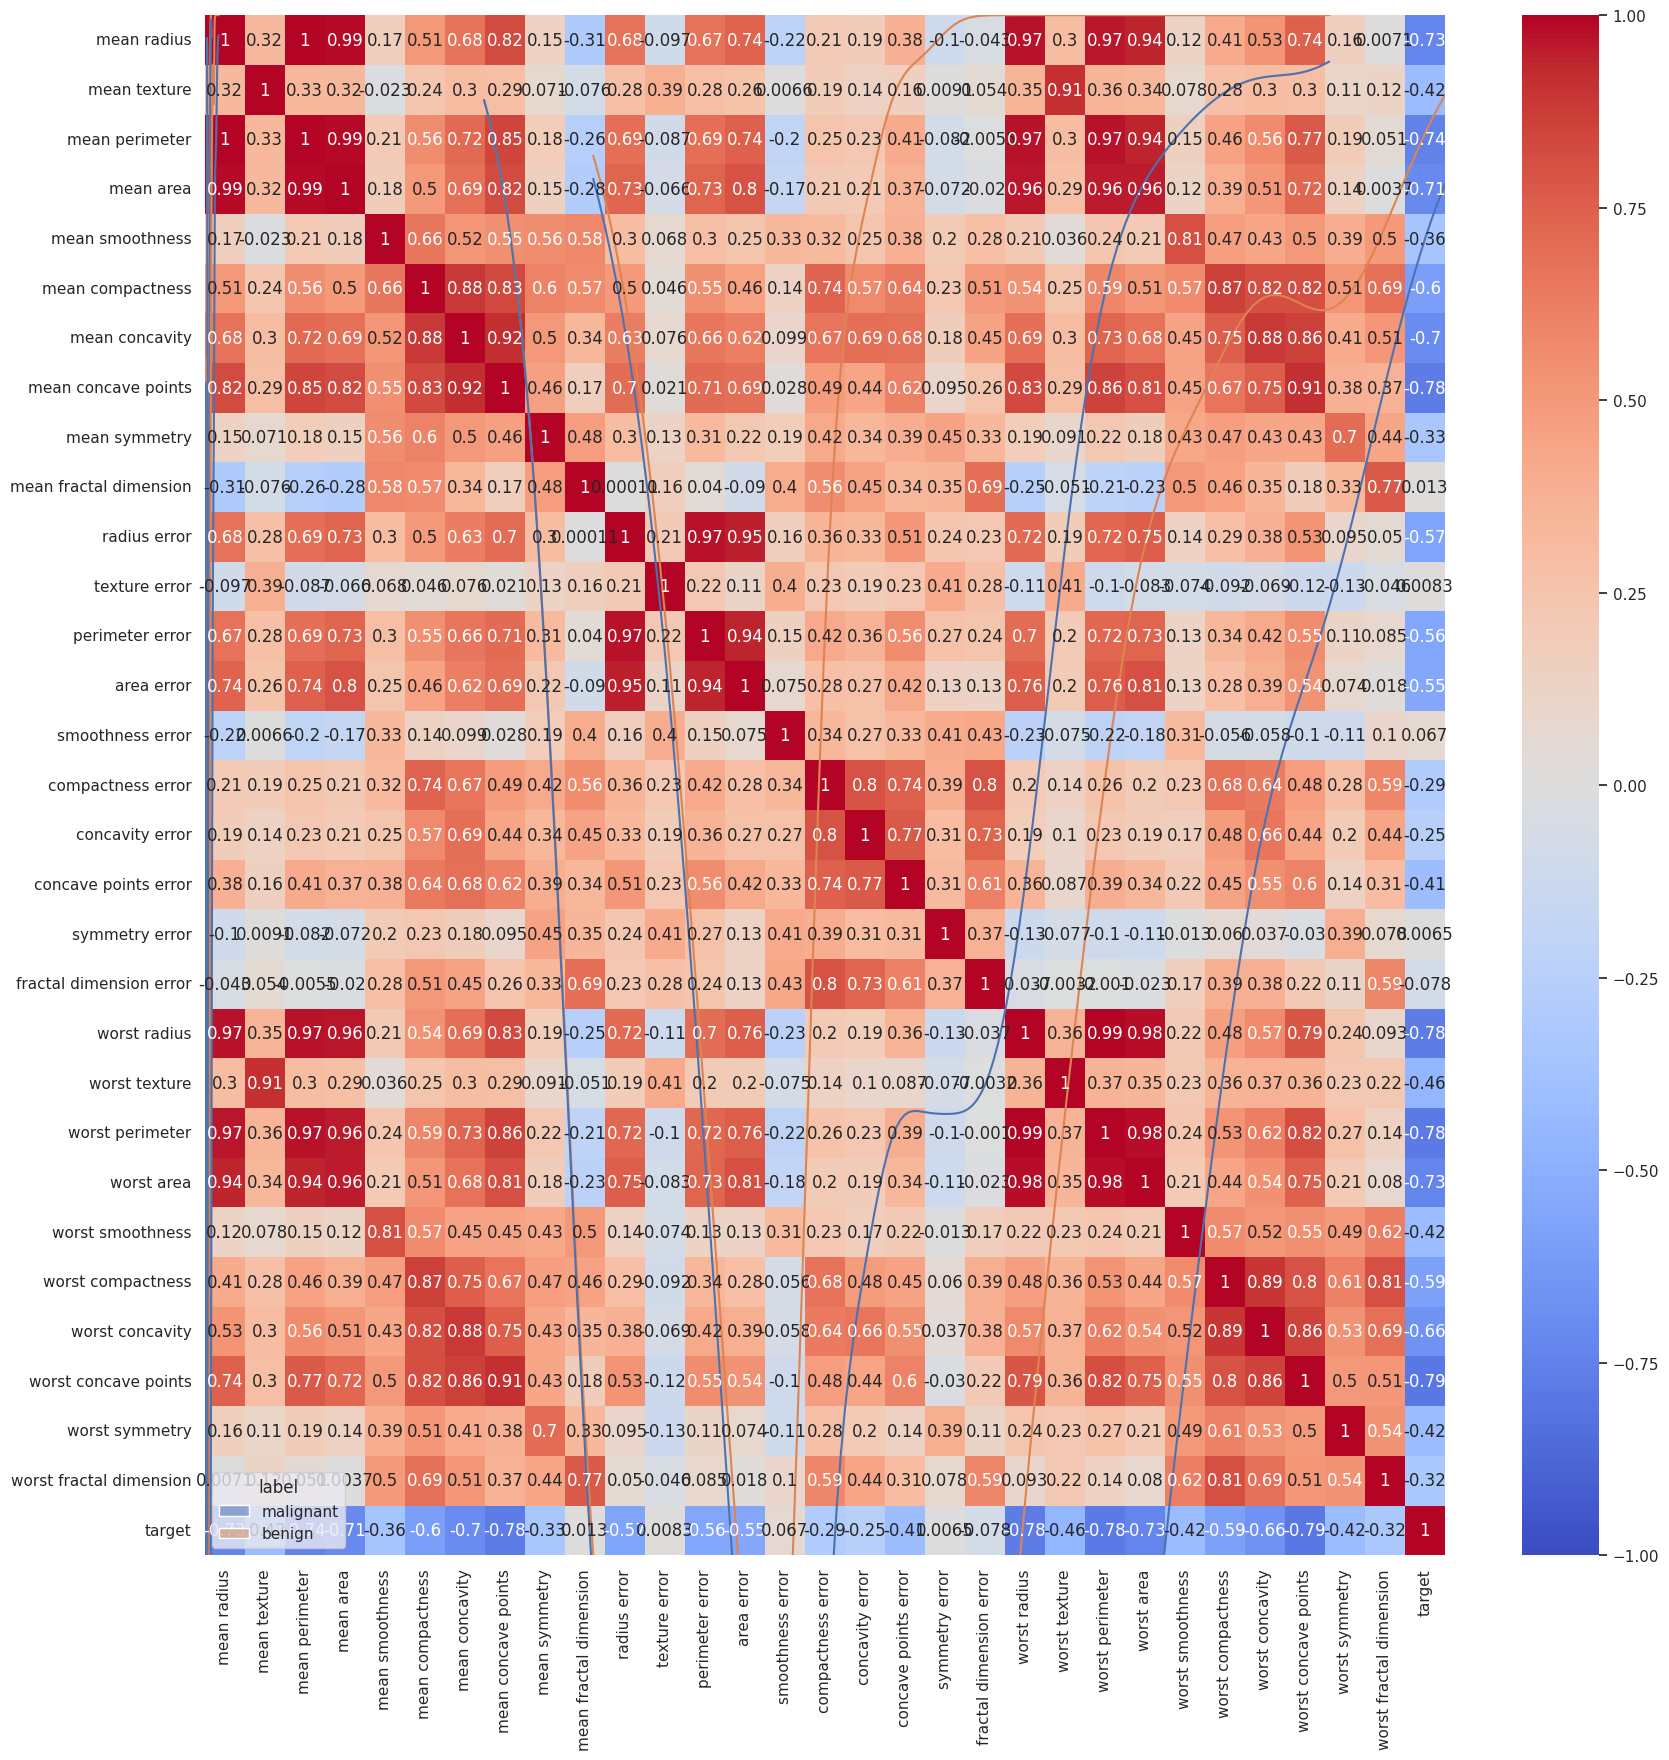

In [4]:
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = datasets.load_breast_cancer()

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['label'] = df['target'].map({0:'malignant', 1:'benign'})

# Plot histogram of the features
sns.set(rc={'figure.figsize':(20,20)})
sns.histplot(df, x="mean radius", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean texture", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean perimeter", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean area", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean smoothness", hue="label", multiple="stack", kde=True)
sns.histplot(df, x="mean compactness", hue="label", multiple="stack", kde=True)


# Plot correlation heatmap of the features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Decision tree


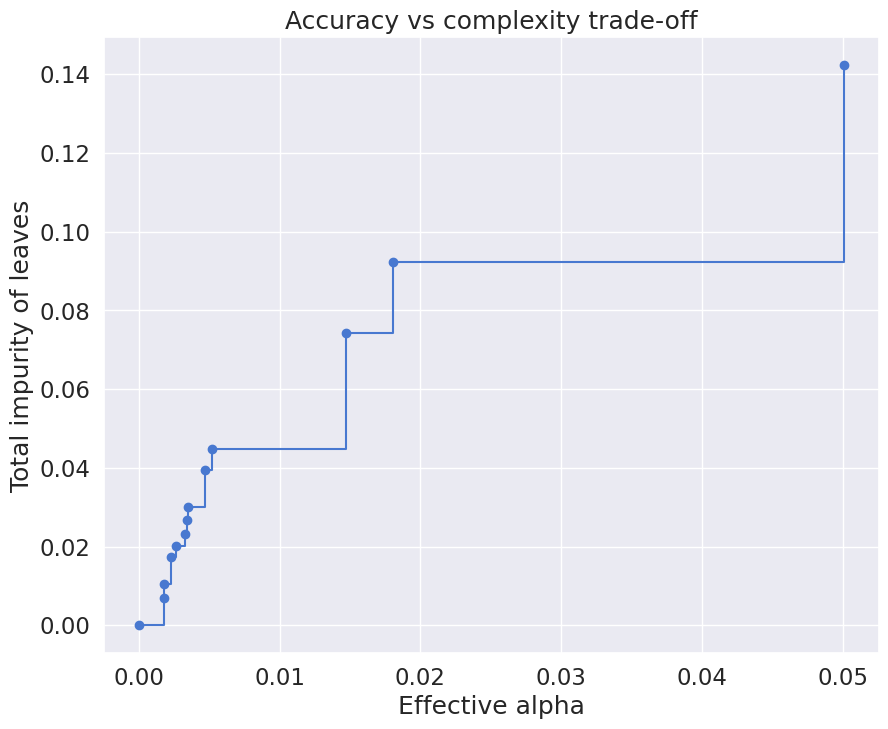

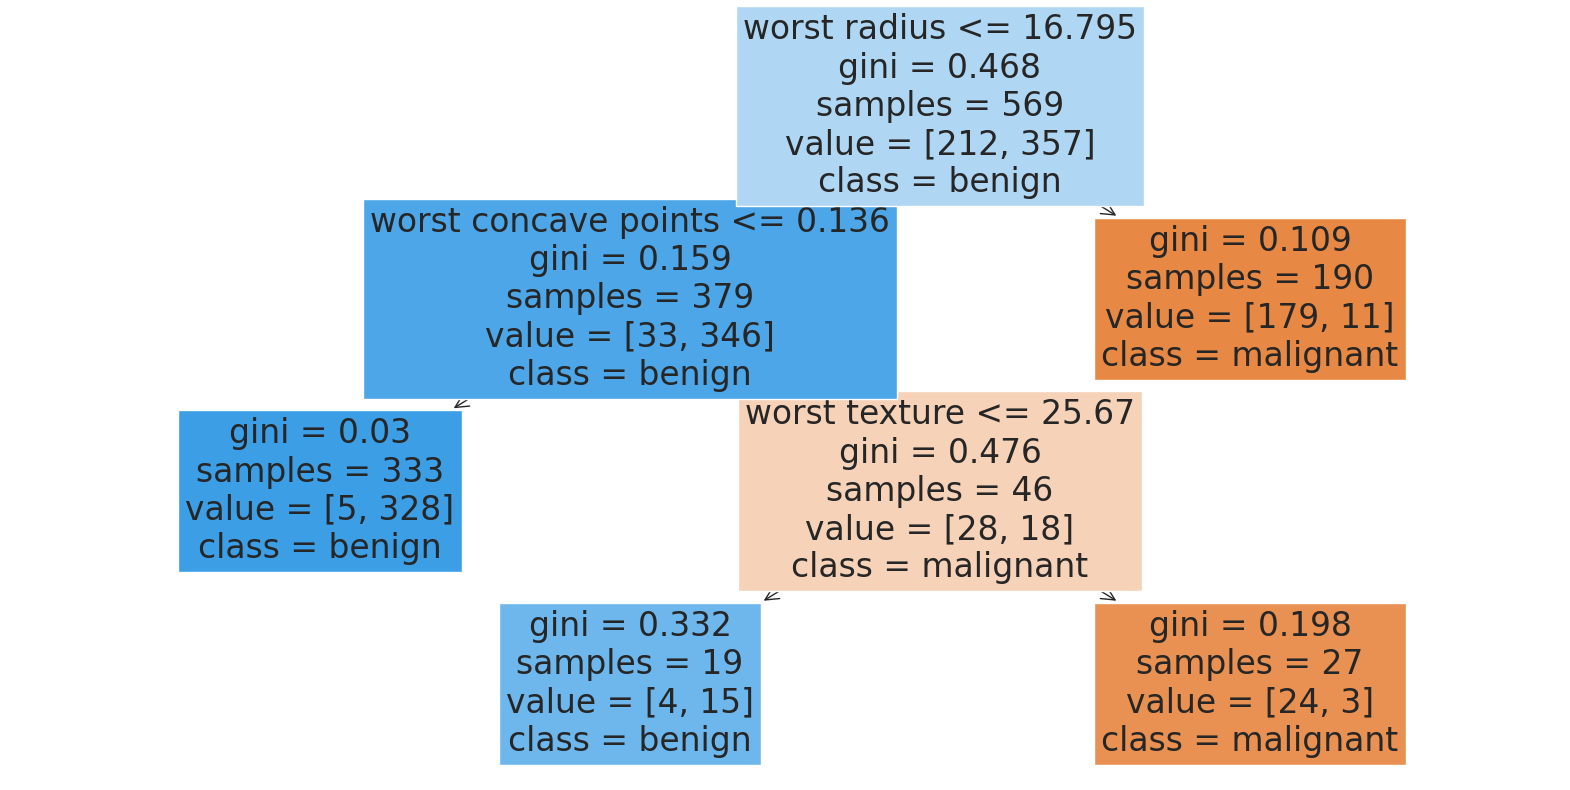

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Compute the cost-complexity pruning path
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X, y)

# Extract the values of ccp_alphas and impurities
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Create a decision tree classifier for each value of ccp_alpha and fit to data
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)

# Visualize the accuracy vs complexity trade-off
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Accuracy vs complexity trade-off")

# Find the optimal value of ccp_alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
clf.fit(X, y)

# Visualize the decision tree with optimal ccp_alpha
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()



RANDOM FOREST

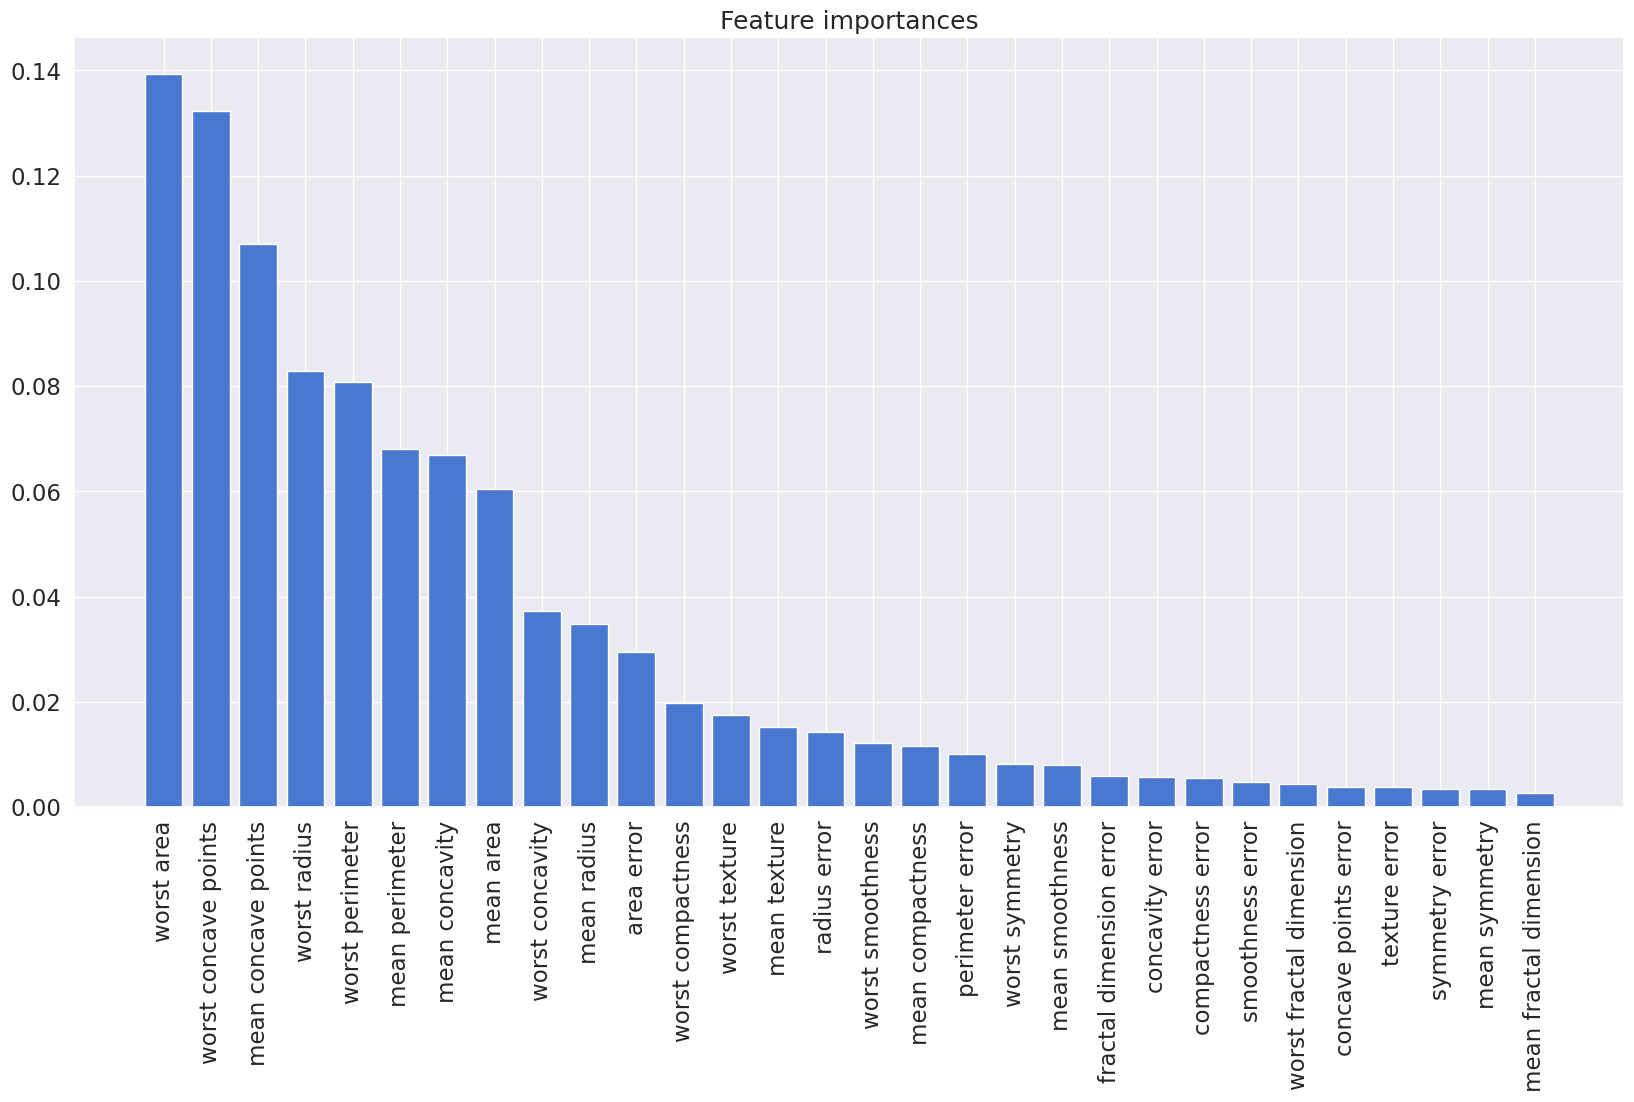

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Create random forest classifier and fit to data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Extract feature importances from random forest classifier
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), data.feature_names[indices], rotation=90)
plt.show()


Self Training

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a logistic regression classifier and fit it to the labeled data
clf = LogisticRegression(random_state=42)
clf.fit(X_labeled, y_labeled)

# Iterate until convergence
max_iterations = 10
for i in range(max_iterations):
    # Use the trained classifier to predict labels for the unlabeled data
    y_pred = clf.predict(X_unlabeled)
    
    # Identify the instances with high confidence
    confidence_threshold = 0.9
    high_confidence_indices = np.where(np.max(clf.predict_proba(X_unlabeled), axis=1) > confidence_threshold)[0]
    
    # Add the high-confidence instances to the labeled data
    X_labeled = pd.concat([X_labeled, X_unlabeled.iloc[high_confidence_indices]])
    y_labeled = pd.concat([y_labeled, pd.Series(y_pred[high_confidence_indices])])
    
    # Remove the high-confidence instances from the unlabeled data
    X_unlabeled = X_unlabeled.iloc[np.delete(np.arange(X_unlabeled.shape[0]), high_confidence_indices)]
    y_unlabeled = y_unlabeled.iloc[np.delete(np.arange(y_unlabeled.shape[0]), high_confidence_indices)]
    
    # Retrain the classifier on the updated labeled data
    clf.fit(X_labeled, y_labeled)

    # Compute the accuracy on the labeled data
    y_pred_labeled = clf.predict(X_labeled)
    accuracy_labeled = accuracy_score(y_labeled, y_pred_labeled)
    
    # Compute the accuracy on the test data
    y_pred_test = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    # Print the iteration number and accuracies
    print("Iteration:", i)
    print("Accuracy on labeled data:", accuracy_labeled)
    print("Accuracy on test data:", accuracy_test)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Iteration: 0
Accuracy on labeled data: 0.9597701149425287
Accuracy on test data: 0.9479553903345725


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 1
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 2
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 3
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Iteration: 4
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316
Iteration: 5
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 6
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 7
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Iteration: 8
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316
Iteration: 9
Accuracy on labeled data: 0.9625468164794008
Accuracy on test data: 0.9516728624535316


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
